# Abordagens preliminares

O código deste notebook consiste na exploração de diferentes formatações dos dados, bem como considerando transformações nas variáveis resposta e algumas análises preliminares.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df_res = pd.read_csv('/content/drive/MyDrive/experimental/resultados.csv')

In [ ]:
df_V2 = pd.read_csv('/content/drive/MyDrive/experimental/resultados2.csv')

In [ ]:
df_V2

,dataset,MSE,model
0,1,0.097734,rf
1,1,0.081914,lm
2,1,0.150532,lasso
3,2,0.019822,rf
4,2,0.016165,lm
5,2,0.034859,lasso
6,3,0.144602,rf
7,3,0.219423,lm
8,3,0.402869,lasso
9,4,0.018532,rf


In [ ]:
df_res

,model,MSE,dataset
0,linearModel,0.260573,1_1
1,linearModel,0.323607,1_2
2,linearModel,0.267897,1_3
3,linearModel,0.335189,1_4
4,linearModel,0.321589,1_5
5,randomForest,0.177081,1_1
6,randomForest,0.177880,1_2
7,randomForest,0.236820,1_3
8,randomForest,0.356954,1_4
9,randomForest,0.258700,1_5


In [ ]:
!pip install pingouin
import pingouin as pg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_res.head()

,model,MSE,dataset
0,linearModel,0.260573,1_1
1,linearModel,0.323607,1_2
2,linearModel,0.267897,1_3
3,linearModel,0.335189,1_4
4,linearModel,0.321589,1_5


## Testando normalidade para a variável resposta

In [ ]:
pg.normality(data=df_res, dv='MSE', group='model')

,W,pval,normal
linearModel,0.797793,0.003445,False
randomForest,0.868988,0.032607,False
lasso,0.847127,0.015817,False


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'MSE ~ model'

model = ols(formula, data=df_res).fit()
res = model.resid

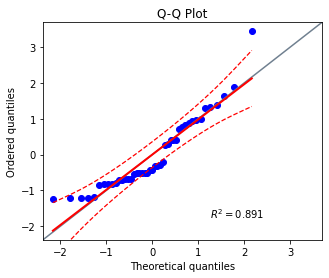

In [ ]:
# QQ plot
ax = pg.qqplot(res, dist='norm')

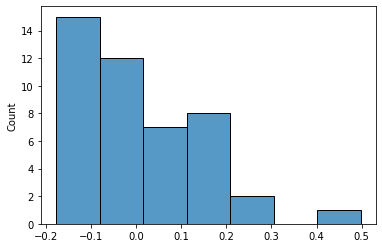

In [ ]:
import seaborn as sns

ax = sns.histplot(res)

In [ ]:
pg.normality(res)

,W,pval,normal
0,0.893503,0.000598,False


In [ ]:
#Shapiro-Wilk test with scipy

from scipy.stats import shapiro

shapiro(res)

ShapiroResult(statistic=0.8935032486915588, pvalue=0.000598424521740526)

## Aplicando transformação log

In [ ]:
import numpy as np
# Python log transform
df_res.insert(len(df_res.columns), 'MSE_log',
         np.log10(df_res['MSE']))

In [ ]:
df_res

,model,MSE,dataset,MSE_log
0,linearModel,0.260573,1_1,-1.344874
1,linearModel,0.323607,1_2,-1.128226
2,linearModel,0.267897,1_3,-1.317154
3,linearModel,0.335189,1_4,-1.093061
4,linearModel,0.321589,1_5,-1.134480
5,randomForest,0.177081,1_1,-1.731149
6,randomForest,0.177880,1_2,-1.726649
7,randomForest,0.236820,1_3,-1.440456
8,randomForest,0.356954,1_4,-1.030149
9,randomForest,0.258700,1_5,-1.352088


## Testando normalidade para os dados transformados

In [ ]:
pg.normality(data=df_res, dv='MSE_log', group='model')

,W,pval,normal
linearModel,0.862341,0.026088,False
randomForest,0.872277,0.036447,False
lasso,0.889957,0.066958,True


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'MSE_log ~ model'

model = ols(formula, data=df_res).fit()
res = model.resid

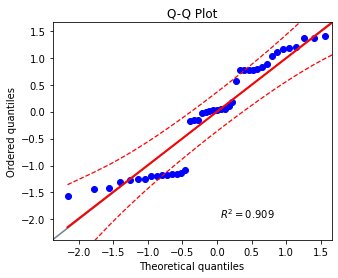

In [ ]:
# QQ plot
ax = pg.qqplot(res, dist='norm')

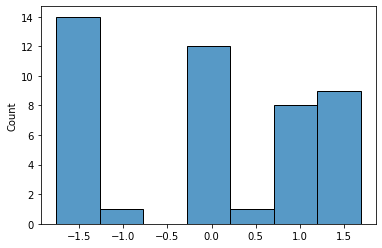

In [ ]:
import seaborn as sns

ax = sns.histplot(res)

In [ ]:
pg.normality(res)

,W,pval,normal
0,0.892992,0.000577,False


In [ ]:
#Shapiro-Wilk test with scipy

from scipy.stats import shapiro

shapiro(res)

ShapiroResult(statistic=0.8929919600486755, pvalue=0.0005774688324891031)

## Transformação Raiz Quadrada

In [ ]:
# Python Square root transformation
df_res.insert(len(df_res.columns), 'MSE_Sqrt', np.sqrt(df_res['MSE']))

In [ ]:
df_res

,model,MSE,dataset,MSE_log,MSE_Sqrt
0,linearModel,0.260573,1_1,-1.344874,0.510463
1,linearModel,0.323607,1_2,-1.128226,0.568865
2,linearModel,0.267897,1_3,-1.317154,0.517587
3,linearModel,0.335189,1_4,-1.093061,0.578955
4,linearModel,0.321589,1_5,-1.134480,0.567088
5,randomForest,0.177081,1_1,-1.731149,0.420810
6,randomForest,0.177880,1_2,-1.726649,0.421758
7,randomForest,0.236820,1_3,-1.440456,0.486641
8,randomForest,0.356954,1_4,-1.030149,0.597456
9,randomForest,0.258700,1_5,-1.352088,0.508625


In [ ]:
pg.normality(data=df_res, dv='MSE_Sqrt', group='model')

,W,pval,normal
linearModel,0.841230,0.013079,False
randomForest,0.897950,0.088558,True
lasso,0.906914,0.121433,True


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'MSE_Sqrt ~ model'

model = ols(formula, data=df_res).fit()
res = model.resid

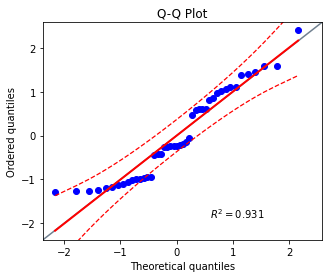

In [ ]:
# QQ plot
ax = pg.qqplot(res, dist='norm')

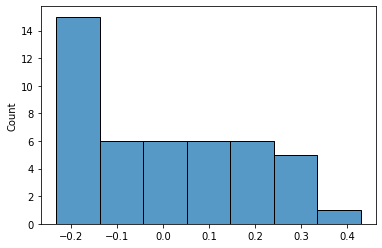

In [ ]:
import seaborn as sns

ax = sns.histplot(res)

In [ ]:
pg.normality(res)

,W,pval,normal
0,0.92055,0.004413,False


In [ ]:
#Shapiro-Wilk test with scipy

from scipy.stats import shapiro

shapiro(res)

ShapiroResult(statistic=0.9205496907234192, pvalue=0.0044133225455880165)

## Tranformação Box-Cox

In [ ]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
df_res.insert(len(df_res.columns), 'MSE_Boxcox', boxcox(df_res['MSE'])[0])

In [ ]:
df_res

,model,MSE,dataset,MSE_log,MSE_Sqrt,MSE_Boxcox
0,linearModel,0.260573,1_1,-1.344874,0.510463,-1.255644
1,linearModel,0.323607,1_2,-1.128226,0.568865,-1.064969
2,linearModel,0.267897,1_3,-1.317154,0.517587,-1.231485
3,linearModel,0.335189,1_4,-1.093061,0.578955,-1.033615
4,linearModel,0.321589,1_5,-1.134480,0.567088,-1.070534
5,randomForest,0.177081,1_1,-1.731149,0.420810,-1.585204
6,randomForest,0.177880,1_2,-1.726649,0.421758,-1.581440
7,randomForest,0.236820,1_3,-1.440456,0.486641,-1.338421
8,randomForest,0.356954,1_4,-1.030149,0.597456,-0.977237
9,randomForest,0.258700,1_5,-1.352088,0.508625,-1.261920


In [ ]:
pg.normality(data=df_res, dv='MSE_Boxcox', group='model')

,W,pval,normal
linearModel,0.861725,0.025558,False
randomForest,0.881787,0.050454,True
lasso,0.899360,0.093056,True


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'MSE_Boxcox ~ model'

model = ols(formula, data=df_res).fit()
res = model.resid

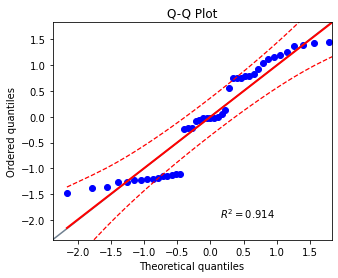

In [ ]:
# QQ plot
ax = pg.qqplot(res, dist='norm')

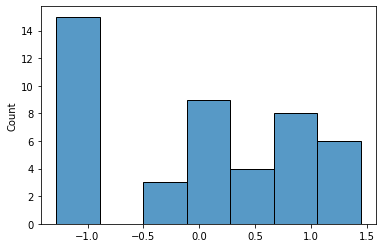

In [ ]:
import seaborn as sns

ax = sns.histplot(res)

In [ ]:
#Shapiro-Wilk test with scipy

from scipy.stats import shapiro

shapiro(res)

ShapiroResult(statistic=0.8979048132896423, pvalue=0.0008158618584275246)

## Testando Sphericity

In [ ]:
df_res.head()

,model,MSE,dataset,MSE_log,MSE_Sqrt,MSE_Boxcox
0,linearModel,0.260573,1_1,-1.344874,0.510463,-1.255644
1,linearModel,0.323607,1_2,-1.128226,0.568865,-1.064969
2,linearModel,0.267897,1_3,-1.317154,0.517587,-1.231485
3,linearModel,0.335189,1_4,-1.093061,0.578955,-1.033615
4,linearModel,0.321589,1_5,-1.134480,0.567088,-1.070534


In [ ]:
pg.sphericity(data=df_res, dv='MSE', subject='dataset', within='model')

SpherResults(spher=False, W=0.5382748786208832, chi2=8.05201699242714, dof=2, pval=0.017845418038769326)

In [ ]:
pg.sphericity(data=df_res, dv='MSE_log', subject='dataset', within='model')

SpherResults(spher=False, W=0.4246097310080863, chi2=11.135602554908557, dof=2, pval=0.003818867839240266)

In [ ]:
pg.sphericity(data=df_res, dv='MSE_Sqrt', subject='dataset', within='model')

SpherResults(spher=True, W=0.9391142790157843, chi2=0.8166353557291969, dof=2, pval=0.6647676633031984)

In [ ]:
pg.sphericity(data=df_res, dv='MSE_Boxcox', subject='dataset', within='model')

SpherResults(spher=False, W=0.6035244492606279, chi2=6.564593448660536, dof=2, pval=0.03754193424177525)

## ANOVA RP

In [ ]:
res = pg.rm_anova(dv='MSE', within='model', subject='dataset', data=df_res, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,model,0.070740,2,0.035370,10.015834,0.000523,0.002645,0.070438,0.684123,False,0.538275,0.017845
1,Error,0.098879,28,0.003531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
res = pg.rm_anova(dv='MSE_log', within='model', subject='dataset', data=df_res, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,model,3.607073,2,1.803536,50.310056,5.368934e-10,4.441327e-07,0.060132,0.634763,False,0.42461,0.003819
1,Error,1.003756,28,0.035848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
res = pg.rm_anova(dv='MSE_Sqrt', within='model', subject='dataset', data=df_res, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,model,0.094608,2,0.047304,25.758549,4.505729e-07,0.061763,0.942609
1,Error,0.051420,28,0.001836,NaN,NaN,NaN,NaN


In [ ]:
from statsmodels.stats.anova import AnovaRM

In [ ]:
# Conduct the repeated measures ANOVA
print(AnovaRM(data=df_res, depvar='MSE',
              subject='dataset', within=['model']).fit())

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
model 10.0158 2.0000 28.0000 0.0005



In [ ]:
# Conduct the repeated measures ANOVA
print(AnovaRM(data=df_res, depvar='MSE_log',
              subject='dataset', within=['model']).fit())

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
model 50.3101 2.0000 28.0000 0.0000



In [ ]:
# Conduct the repeated measures ANOVA
print(AnovaRM(data=df_res, depvar='MSE_Sqrt',
              subject='dataset', within=['model']).fit())

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
model 25.7585 2.0000 28.0000 0.0000



## Processo para conjunto de dados reduzido

In [ ]:
df_V2

,dataset,MSE,model
0,1,0.097734,rf
1,1,0.081914,lm
2,1,0.150532,lasso
3,2,0.019822,rf
4,2,0.016165,lm
5,2,0.034859,lasso
6,3,0.144602,rf
7,3,0.219423,lm
8,3,0.402869,lasso
9,4,0.018532,rf


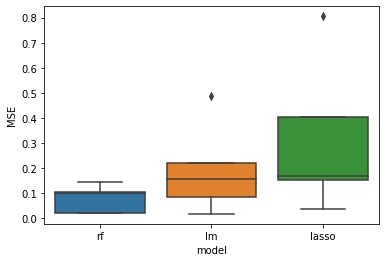

In [ ]:
sns.boxplot(x='model', y='MSE', data=df_V2)

In [ ]:
pg.normality(data=df_V2, dv='MSE', group='model')

,W,pval,normal
rf,0.872608,0.277145,True
lm,0.906244,0.445354,True
lasso,0.874931,0.286969,True


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'MSE ~ model'

model = ols(formula, data=df_V2).fit()
res = model.resid

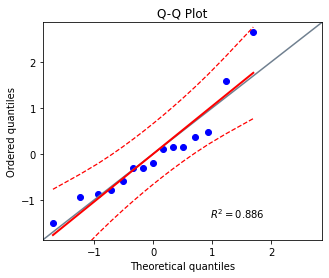

In [ ]:
# QQ plot
ax = pg.qqplot(res, dist='norm')

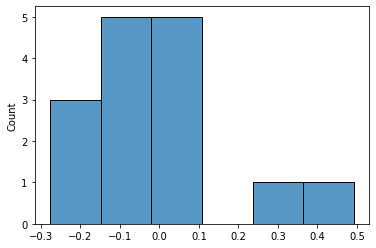

In [ ]:
import seaborn as sns

ax = sns.histplot(res)

In [ ]:
#Shapiro-Wilk test with scipy

from scipy.stats import shapiro

shapiro(res)

ShapiroResult(statistic=0.9019070863723755, pvalue=0.10178007930517197)

In [ ]:
import numpy as np
# Python log transform
df_V2.insert(len(df_V2.columns), 'MSE_log',
         np.log10(df_V2['MSE']))

In [ ]:
# Python Square root transformation
df_V2.insert(len(df_V2.columns), 'MSE_Sqrt', np.sqrt(df_V2['MSE']))

In [ ]:
pg.sphericity(data=df_V2, dv='MSE', subject='dataset', within='model')

SpherResults(spher=True, W=75.63819940187807, chi2=-12.977884315999784, dof=2, pval=1.0)

In [ ]:
res = pg.rm_anova(dv='MSE', within='model', subject='dataset', data=df_V2, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,model,0.138857,2,0.069429,2.581239,0.136461,0.210642,0.517229
1,Error,0.215179,8,0.026897,NaN,NaN,NaN,NaN
